In [2]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np
import sympy as sp
import cn_utils as cn
x,t = sp.symbols('x t')


O objetivo desse capitulo é resolver a equação $f(x) = 0$ e achar o valor de $x$. Para algumas funções simples, tipo as funções quadraticas, temos uma formula analitica que nos ajudam encontrar o valor de $x$. Mas existem muitas funções para as quais as raízes não podem ser determinadas tão facilmente. Por exemplo, mesmo uma função aparentemente simples como
$f(x) = e^{−x} − x$ não pode ser resolvida analiticamente. Em tais casos, a única alternativa é
uma técnica de solução aproximada.

Em muitos modelos que ocorrem geralmente na engenharia temos uma variavel dependente como função das variaveis independentes, termos forçantes e parametros. Observe que, em cada caso, as variáveis dependentes refletem o estado ou o desempenho do sistema, enquanto os parâmetros representam suas propriedades ou composição.
Um exemplo de tal modelo é a equação, deduzida da segunda lei de Newton, usada
no Capítulo anterior para a velocidade do pára-quedista:
$$
v = v(t) = \frac{gm}{c}(1-e^{-(c/m)t})
$$
onde $v$ é a variável dependente, o tempo $t$ é a variável independente, a constante gravitacional $g$ é o termo forçante e o coeficiente de arrasto $c$ e a massa $m$ são parâmetros. Tais cálculos podem ser feitos diretamente porque $v$ é expressa *explicitamente* como uma função do tempo. Isto é, ela está isolada em um lado do sinal de igual.

Embora a Equação acima forneça uma representação matemática da inter-relação entre as variáveis e os parâmetros do modelo, ela não pode ser resolvida explicitamente para determinar o coeficiente de arrasto. Tente fazer isso. Não há maneira de reorganizar a equação de forma que $c$ esteja isolado em um lado do sinal de igual. Em tais casos, dizemos que c está *implícito*. A solução do dilema é fornecida pelos métodos numéricos para raízes de equações.
Para resolver o problema usando métodos numéricos, é conveniente reescrever a Equação
acima. Isso é feito subtraindo-se a variável dependente $v$ de ambos os lados da equação
para obter
$$
f(c) = \frac{gm}{c}(1-e^{-(c/m)t}) - v
$$
O valor de $c$ que torna $f(c) = 0$ é, portanto, a raiz da equação. Esse valor também representa o coeficiente de arrasto que resolve o problema de engenharia.

# Métodos Intervalares (Bracketing Methods)

Este capítulo sobre raízes de equações trata de métodos que exploram o fato de que uma
função tipicamente muda de sinal na vizinhança de uma raiz. Essas técnicas (bracketing
methods), que isolam a raiz em um intervalo, exigem duas estimativas iniciais para a raiz.
Tais estimativas devem “delimitar” a — ou estar uma de cada lado da — raiz. Os méto-
dos particulares descritos aqui usam estratégias diferentes para sistematicamente dimi-
nuir a largura do intervalo e, portanto, aproximar-se da resposta correta.

## Métodos Gráficos

Um método simples para obter uma estimativa da raiz da equação $f(x) = 0$ é fazer um gráfico da função e observar onde ela corta o eixo dos $x$. Esse ponto, que representa o valor de $x$ para o qual $f(x) = 0$, fornece uma aproximação grosseira da raiz.

### Exemplo: 
Use a abordagem gráfica para determinar o coeficiente de
arrasto $c$ necessário para que um páraquedista de massa $m = 68.1 kg$ tenha uma velocidade de $40 m/s$ depois de cair em queda livre por $t = 10 s$. Observação: a aceleração da
gravidade é $9.8 m/s^2$ .

**Resolução:**
$$
f(c) = \frac{9.8 (68.1)}{c}(1 - e^{-(c/68.1)10}) - 40 = \frac{667.38}{c}(1 - e^{-0.146843 c}) - 40
$$

In [3]:
c = np.linspace(1,30, 100)
f = lambda c: (667.38/c)*(1 - np.exp(-0.146843*c)) - 40
f_c = f(c)

In [4]:
fig = make_subplots(rows=1, cols=3)

fig.add_scatter(x=c, y=f_c, row=1, col=1)
fig.update_xaxes(title_text="Intervalo completo", range=[1, 30], row=1, col=1)

fig.add_scatter(x=c, y=f_c, row=1, col=2)
fig.update_xaxes(title_text="Zoomando", range=[13, 16], row=1, col=2)

fig.add_scatter(x=c, y=f_c, row=1, col=3)
fig.update_xaxes(title_text="Zoomando mais", range=[14.5, 15], row=1, col=3)


fig.update_layout(height=600, width=800, title_text="Metodo Gráfico", showlegend=False)

Olhando para o grafico podemos testar alguns valores para aproximar a raiz

In [16]:
t_test = np.linspace(14.5, 15, 11)

for point in t_test: 
    print(f'No ponto c= {point} o valor da função é {f(point)}')


No ponto c= 14.5 o valor da função é 0.5523282056876297
No ponto c= 14.55 o valor da função é 0.45287837983074297
No ponto c= 14.6 o valor da função é 0.35381879948397454
No ponto c= 14.65 o valor da função é 0.2551475898353459
No ponto c= 14.7 o valor da função é 0.15686288611858146
No ponto c= 14.75 o valor da função é 0.058962833555469274
No ponto c= 14.8 o valor da função é -0.038554412701259366
No ponto c= 14.85 o valor da função é -0.13569068762480896
No ponto c= 14.9 o valor da função é -0.23244781637085055
No ponto c= 14.95 o valor da função é -0.3288276143336546
No ponto c= 15.0 o valor da função é -0.4248318872019681


As técnicas gráficas têm valor prático limitado porque não são precisas. Entretanto,
os métodos gráficos podem ser usados para obter estimativas grosseiras das raízes. Essas
estimativas são usadas como aproximações iniciais para os métodos numéricos discutidos
neste capítulo.

Alem disso, esses metodos são importantes para estudar as propriedades das funções, por exemplo, verficar se a função tem *raíze múltipla* em um intervalo, ou se o ponto de interseção com o eixo $x$ é um ponto tangente. Nestes casos tornam dificel desenvolver algoritmos computacionais gerais que garantam a localização de todas as raízes em um intervalo. Entretanto, quando usados junto com abordagens gráficas, os métodos descritos
nas seções seguintes são extremamente úteis para resolver problemas de raízes de equa-
ções confrontados rotineiramente por engenheiros e matemáticos aplicados.

### Exemplo:
A função
$$
f(x) = \sin 10x + \cos 3x
$$
tem diversas raízes no intervalo de $x = 0$ a $x = 5$. Use gráficos computacionais para
adquirir uma percepção do comportamento dessa função.

In [22]:
x = np.linspace(0,5, 500)
f = lambda x: np.sin(10*x) + np.cos(3*x)
f_x = f(x)

In [32]:
fig = make_subplots(rows=1, cols=3)

fig.add_scatter(x=x, y=f_x, row=1, col=1)
fig.update_xaxes(title_text="Intervalo completo", 
                range=[0, 5], row=1, col=1)

fig.add_scatter(x=x, y=f_x, row=1, col=2)
fig.update_xaxes(title_text="Zoomando", range=[3, 5], row=1, col=2)

fig.add_scatter(x=x, y=f_x, row=1, col=3)
fig.update_xaxes(title_text="Zoomando mais", range=[4.2, 4.3], row=1, col=3)


fig.update_layout(height=600, width=800, title_text="Metodo Gráfico", showlegend=False)

## O Método da Bisseção

O método da bissecção, que é alternativamente chamado de truncamento binário, divisão do intervalo na metade, ou método de Bolzano, é um tipo de método de busca incremental no qual o intervalo é sempre dividido na metade. Se uma função muda de sinal em
um intervalo, calcula-se o valor da função em seu ponto médio. A posição da raiz é então
determinada como sendo o ponto médio do subintervalo no qual a mudança de sinal ocorre.
Esse processo é repetido para obter estimativas refinadas.

Em geral, se $f(x)$ for real e contínua no intervalo de $x_l$ a $x_u$ e $f(x_l)$ e $f(x_u )$ tiverem sinais opostos, isto é,
$$
f(x_l)f(x_u) < 0
$$

Um algoritmo simples para os cálculos da bissecção é

- Passo 1: Escolha as aproximações inferior $x_l$ e superior $x_u$ para a raiz de modo que a
função mude de sinal no intervalo. Isso pode ser verificado garantindo que $f(x_l)f(x_u) < 0$

- Passo 2: Uma estimativa da raiz é determinada por
$$
x_r = \frac{x_l + x_u}{2}
$$
- Passo 3:  Faça os seguintes cálculos para determinar em qual subintervalo a raiz está:
  - (a) se $f(x_l)f(x_r) < 0$, a raiz está no subintervalo inferior. Portanto, faça $x_u = x_r$ e volte ao passo 2
  - (b) se $f(x_l)f(x_r) > 0$, a raiz está no subintervalo superior. Portanto, faça $x_l = x_r$ e volte ao passo 2.
  - (c) se $f(x_l)f(x_r) = 0$, a raiz é igual a $x_r$ ; pare os cálculos.

<img src="./images/bisection.jpg" style="width:400px;height:400px;">


Uma implementação minimalista deste algoritmo é 

In [91]:
def bisection_minimal(func, xl, xu, max_iter=5):

    for i in range(max_iter):
        
        xr = (xl + xu)/2
        print(xr)
        f_xr = func(xr)
        f_xl = func(xl)
        if f_xl * f_xr < 0:
            xu = xr
        elif f_xl * f_xr > 0:
            xl = xr
        else:
            return xr
            
    return xr


In [92]:
f = lambda x: (667.38/x)*(1 - np.exp(-0.146843*x)) - 40


In [93]:
bisection_minimal(f, 12, 16)

14.0
15.0
14.5
14.75
14.875


14.875

Considerando a discussão sobre o erro numerico, um erro relativo porcentual aproximado $varepsilon_a$ pode ser calculado por

$$
\varepsilon_a = \big|\frac{x_r^{novo} - x_r^{velho}}{x_r^{novo}}\big| 100\%
$$
onde $x_r^{novo}$ é a raiz da iteração atual e $x_r^{velho}$ é a raiz da iteração prévia. O valor absoluto é usado porque, em geral, estamos interessados no módulo de $\varepsilon_a$  em vez de no seu sinal. Quando $\varepsilon_a$ a se torna menor do que um critério de parada pré-especificado $\varepsilon_s$ , param-se os cálculos.

In [86]:
def bisection(func, xl, xu, tol=1e-3, max_iter=100):
    assert func(xu) * func(xl) < 0, 'func(xu) * func(xl) must be a negative value'

    iteration = 0
    error = abs((xu-xl)/xu) * 100
    xr = (xl + xu)/2 + 0.1 * (xl + xu)/2

    while error > tol and iteration < max_iter:
        xr_old = xr
        xr = (xl + xu)/2
        
        f_xr = func(xr)
        f_xl = func(xl)

        if f_xl * f_xr < 0:
            xu = xr
        elif f_xl * f_xr > 0:
            xl = xr
        else:
            return xr
            
        error = abs((xr-xr_old)/xr) * 100
        print('xr', xr, 'error', error)

        iteration += 1

    return xr


In [89]:
bisection(f, 12, 16, tolerance=5e-1)

xr 14.0 error 10.000000000000002
xr 15.0 error 6.666666666666667
xr 14.5 error 3.4482758620689653
xr 14.75 error 1.694915254237288
xr 14.875 error 0.8403361344537815
xr 14.8125 error 0.42194092827004215


14.8125

No caso de metodo de bisseção o numero de iterações necessarias para chegar em um erro desejado tem uma formula fechada e é sabido antes de iniciar o calculo

$$

n = \frac{log (\Delta x^0/E_{a,d})}{\log2} = \log_2(\frac{\Delta x^0}{E_{a,d}})
$$
onde $E_{a,d}$ é o erro relativo fracionario aproximado desejado e $\Delta x^0 = x_u^0 - x_l^0$.

## O Método da Falsa Posição

Embora a bissecção seja uma técnica perfeitamente válida para determinar raízes, sua
abordagem do tipo “força bruta” é relativamente ineficiente. A falsa posição é uma alternativa baseada na percepção gráfica.
Uma deficiência do método da bissecção é que, na divisão do intervalo de $x_l$ a $x_u$ em
metades iguais, não são levados em conta os módulos de $f(x_l)$ e $f(x_u)$. Por exemplo, se $f(x_l)$ estiver muito mais próximo de zero do que $f(x_u)$, será provável que a raiz esteja mais
próxima de $x_l$ do que de $x_u$. Um método alternativo que explora essa percepção gráfica é ligar $f(x_l)$ e $f(x_u)$ por uma reta. A intersecção dessa reta com o eixo $x$ representa uma estimativa melhorada da raiz. O fato de a substituição da curva por uma reta
dar uma “falsa posição” da raiz é a origem do nome, método da falsa posição, ou, em
latim, regula falsi. Ele também é chamado de método da interpolação linear.
Usando triângulos semelhantes, a intersecção da reta com o eixo $x$ pode ser calculada por

$$
\frac{f(x_l)}{x_r - x_l} = \frac{f(x_u)}{x_r - x_u}
$$
que pode ser reescrita como
$$
x_r = x_u - \frac{f(x_u)(x_l - x_u)}{f(x_l) - f(x_u)}
$$

<img src="./images/false_position.jpg" style="width:400px;height:400px;">

O valor de $x_r$ calculado com a Equação acima então substitui qualquer das duas aproximações iniciais $x_l$ ou $x_u$ que forneça um valor da função com o mesmo sinal que $f (x_r )$. Dessa forma, os valores $x_l$ e $x_u$ sempre delimitam a raiz verdadeira.
A abordagem mencionada para o metodo *falsa posição* tem um problema mas, antes de descutir sobre ele vamos implementar uma versão minimalista deste metodo


In [109]:
def false_position_minimal(func, xl, xu, max_iter=5):
    for i in range(max_iter):
        f_xu = func(xu)
        f_xl = func(xl)
        xr = xu - (f_xu*(xl-xu))/(f_xl - f_xu)
        print('xr is: ', xr)
        if func(xr) * f_xu > 0:
            xu = xr
        elif func(xr) * f_xu < 0:
            xl = xr
        else:
            return xr
    
    return xr



### Exemplo:
Use o método da falsa posição para determinar a raiz da
mesma equação investigada no exemplo da seção anterior

**Resolução:**



In [110]:
f = lambda x: (667.38/x)*(1 - np.exp(-0.146843*x)) - 40

false_position_minimal(f, 12, 16, max_iter=10)

xr is:  14.911307713658712
xr is:  14.794197551807244
xr is:  14.781700103915494
xr is:  14.78036760579795
xr is:  14.780225546043724
xr is:  14.780210400978051
xr is:  14.780208786356297
xr is:  14.780208614220825
xr is:  14.780208595869388
xr is:  14.780208593912937


14.780208593912937

O metodo falsa posição se converge mais rapido do que o bisseção

<img src="./images/bis_fals.jpg" style="width:400px;height:500px;">


### Armadilhas do Método da Falsa Posição

Embora o método da falsa posição possa parecer sempre ser o melhor dos métodos inter-
valares, há casos em que seu desempenho é deficiente. Na realidade, como ocorre no
próximo exemplo, há certos casos nos quais a bissecção fornece resultados superiores.

### Exemplo:
Use a bissecção e a falsa posição para localizar a raiz de
$$
f(x) = x^{10} - 1
$$
entre $x=0$ e $x=1.3$.

In [100]:
f1 = lambda x: x**10 -1

In [112]:
# usando o metodo de bisseção minimalista temos 

bisection_minimal(f1, 0, 1.3, max_iter=5)

0.65
0.9750000000000001
1.1375000000000002
1.0562500000000001
1.015625


1.015625

In [111]:
#usando o metodo de falsa posição temos 

false_position_minimal(f1, 0, 1.3, max_iter=5)

xr is:  0.09429959537232735
xr is:  0.1817588725190793
xr is:  0.2628740125203042
xr is:  0.3381051033222693
xr is:  0.4078779165927523


0.4078779165927523

Dá para ver que o valor de $x_r$ está muito longe do valor real. Olhando para o grafico da função percebemos porque isso está acontecendo

In [122]:
def false_position_minimal_return(func, xl, xu, max_iter=5):
    xrs = []
    for i in range(max_iter):
        f_xu = func(xu)
        f_xl = func(xl)
        xr = xu - (f_xu*(xl-xu))/(f_xl - f_xu)
        xrs.append(xr)
        if func(xr) * f_xu > 0:
            xu = xr
        elif func(xr) * f_xu < 0:
            xl = xr
        else:
            return xr

    return xrs

def bisection_minimal_return(func, xl, xu, max_iter=5):
    xrs = []
    for i in range(max_iter):
        
        xr = (xl + xu)/2
        xrs.append(xr)
        f_xr = func(xr)
        f_xl = func(xl)
        if f_xl * f_xr < 0:
            xu = xr
        elif f_xl * f_xr > 0:
            xl = xr
        else:
            return xrs
            
    return xrs

xrs_false = false_position_minimal_return(f1, 0, 1.3, max_iter=10)
xrs_false = np.array(xrs_false)

xrs_bissection = bisection_minimal_return(f1, 0, 1.3, max_iter=10)
xrs_bissection = np.array(xrs_bissection)

x = np.linspace(0,2, 50)
f_x = f1(x)
fig = go.Figure()
fig.add_scatter(x=x, y=f_x, name='x^10-1')
fig.add_scatter(x = xrs_bissection, y=f1(xrs_bissection), mode='markers', name='bissection')
fig.add_scatter(x = xrs_false, y=f1(xrs_false), mode='markers', name='false position')

O exemplo anterior ilustra que generalizações abrangentes com relação aos métodos
de localização de raízes, em geral, não são possíveis. Embora um método como a falsa
posição seja quase sempre superior à bissecção, invariavelmente há casos que violam
essas conclusões gerais. Portanto, além de se usar a aproximação de erro, os resultados deveriam sempre ser verificados substituindo a estimativa da raiz na equação original e verificando se o resultado está próximo a zero. Tal verificação deveria ser incorporada em todos os programas de computador para a localização de raízes.
O exemplo também ilustra uma grande fraqueza do método da falsa posição: ele é
unilateral. Ou seja, conforme as iterações continuam, uma das extremidades do intervalo
terá a tendência de permanecer fixa. Isso pode levar à convergência insatisfatória, particularmente para funções com curvatura significativa.

### O Metodo da Falsa Posição Modificada

Uma forma de abrandar a natureza “unilateral” da falsa posição é fazer o algoritmo detectar quando uma das extremidades está presa. Se isso ocorrer, o valor da função na extremidade presa pode ser dividido por dois, o que é chamado de método da falsa posição modificado.

In [127]:
def false_position(func, xl, xu, tolerance=1e-3, max_iter=100):
    iteration = 0
    iu= il = 0
    error = abs((xu-xl)/xu) * 100
    xr = (xl + xu)/2 + 0.1 * (xl + xu)/2
    f_xu = func(xu)
    f_xl = func(xl)
    while error > tolerance and iteration < max_iter:
        
        
        xr_old = xr
        xr = xu - (f_xu*(xl-xu))/(f_xl - f_xu)
        f_xr = func(xr)

        test = f_xr * f_xl

        if test < 0:
            xu = xr
            f_xu = func(xu)
            iu = 0
            il = il + 1
            if il >= 2: 
                f_xl /= 2
        elif test > 0:
            xl = xr
            f_xl = func(xl)
            il = 0
            iu = iu + 1
            if iu >=2:
                f_xu /= 2
        else:
            return xr
        
        error = abs((xr-xr_old)/xr) * 100
        print('xr', xr, 'error', error)

        iteration += 1
    
    return xr




In [129]:
false_position(f1, 0, 1.3, max_iter=100)

xr 0.09429959537232735 error 658.2217051695009
xr 0.1817588725190793 error 48.11829867483983
xr 0.33301715676712107 error 45.42056803211995
xr 0.5634423147022628 error 40.89596253644958
xr 0.8463635731395354 error 33.42786332211735
xr 1.074910177068493 error 21.261925768742138
xr 0.9454923183277778 error 13.687880507544154
xr 0.9828011093189348 error 3.796168994661739
xr 1.0040954923602121 error 2.120752777330274
xr 0.9996755374546943 error 0.44213894808025606
xr 0.9999940615677148 error 0.03185260045655777
xr 1.0000057046332558 error 0.0011642999121982691
xr 0.9999999998475554 error 0.0005704785701258567


0.9999999998475554

In [131]:
bisection(f1, 0, 1.3, max_iter=100)

xr 0.65 error 10.000000000000009
xr 0.9750000000000001 error 33.333333333333336
xr 1.1375000000000002 error 14.28571428571429
xr 1.0562500000000001 error 7.692307692307695
xr 1.015625 error 4.000000000000013
xr 0.9953125 error 2.0408163265306074
xr 1.00546875 error 1.010101010100997
xr 1.000390625 error 0.5076142131979517
xr 0.9978515625000001 error 0.25445292620865356
xr 0.9991210937500001 error 0.12706480304956191
xr 0.9997558593750001 error 0.06349206349206127
xr 1.0000732421875 error 0.031735956839092035
xr 0.9999145507812501 error 0.015870496746539283
xr 0.9999938964843751 error 0.007934618741565026
xr 1.0000335693359377 error 0.003967151981601295
xr 1.0000137329101564 error 0.0019836153373182287
xr 1.0000038146972656 error 0.0009918175055922962


1.0000038146972656

# Metodos Abertos
Nos métodos intervalares da seção anterior, a raiz era localizada dentro de um intervalo
prescrito por um limitante inferior e um superior. As aplicações repetidas desses métodos
sempre resultam em estimativas mais próximas do valor verdadeiro da raiz. Tais métodos
são ditos convergentes porque se aproximam da verdade à medida que os cálculos
prosseguem.
Em contraste, os métodos abertos descritos neste capítulo são baseados em fórmulas que exigem apenas um único valor inicial de x ou dois valores iniciais que não delimitam necessariamente a raiz. Como tal, eles algumas vezes divergem ou se afastam da
raiz verdadeira à medida que os cálculos prosseguem. Entretanto, quando
os métodos abertos convergem (figura abaixo), eles em geral o fazem muito mais rapidamente do que os métodos intervalares. Iniciaremos nossa discussão das técnicas abertas
com uma versão simples, que será útil para ilustrar sua forma geral e também o conceito
de convergência.

<img src="./images/open.jpg" style="width:400px;height:500px;">


## Iteração de Ponto Fixo Simples

Neste metodo reescrevemos a equação $f(x)=0$ de modo que $x$ esteja isolado no lado esquerdo da equação:
$$
x = g(x)
$$
Pode-se conseguir essa transformação ou por manipulação algébrica ou simplesmente somando $x$ em ambos os lados da equação original. Por exemplo,
$$
x^2 - 2x + 3 = 0
$$
pode ser manipulada de forma simples para obtermos 
$$
x = \frac{x^2 + 3}{2}
$$
enquanto $\sin(x) = 0$ pode ser colocada na forma desejada somando $x$ a ambos os lados para obter
$$
x = \sin x + x
$$
Portanto, dada uma aproximação inicial para a raiz $x_i$ , a Equação do metodo pode ser usada para calcular uma nova estimativa $x_{i+1}$ expressa pela fórmula iterativa
$$
x_{i+1} = g(x_i)
$$
Como as outras fórmulas iterativas, o erro aproximado para essa equação
pode ser determinado usando-se o estimador de erro
$$
\varepsilon_a = |\frac{x_{i+1} - x_i}{x_{i+1}}| 100\%
$$

### **Exemplo:** 
Use a iteração de ponto fixo simples para localizar a raiz de
$$
f(x) = e^{-x} - x
$$
**Resolução:** Podemos reescrever a equação na forma
$$
x_{i+1} = e^{-x_i}
$$
Começando com uma aproximação inicial $x_0 = 0$ temos



In [5]:
xi = 0
iteration = 10
for i in range(iteration):
    x_new = np.exp(-xi)
    erro = (x_new - xi)/x_new * 100
    print(f'x_new é {x_new} e o erro é {abs(erro)}')
    xi = x_new

x_new é 1.0 e o erro é 100.0
x_new é 0.36787944117144233 e o erro é 171.8281828459045
x_new é 0.6922006275553464 e o erro é 46.85363946133844
x_new é 0.5004735005636368 e o erro é 38.30914659333314
x_new é 0.6062435350855974 e o erro é 17.446789681151248
x_new é 0.545395785975027 e o erro é 11.156622525381316
x_new é 0.5796123355033789 e o erro é 5.9033508144086735
x_new é 0.5601154613610891 e o erro é 3.480866979624528
x_new é 0.571143115080177 e o erro é 1.9308039312598229
x_new é 0.5648793473910495 e o erro é 1.1088682420515694


In [11]:
xx = np.linspace(0,2,50)
f = lambda x: np.exp(-x) - x 
yy = f(xx)

fig = go.Figure()
fig.add_scatter(x=xx, y=yy)

-x + exp(-x)

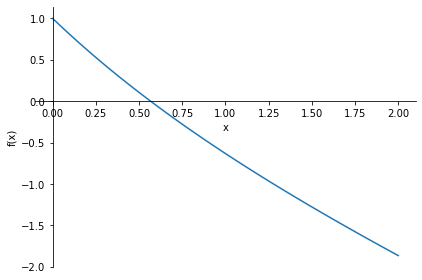

In [5]:
from sympy.plotting import plot
from matplotlib import pyplot as plt

f = sp.exp(-x) -x
display(f)
plot(f, (x,0,2))
plt.show()

Sem entrar na demostração do teorema, se na equação geral da iteração de ponto fixo, $x = g(x)$, temos
$$
E_{t, i+1} = g'(\xi) E_{t,i}.
$$
Então, se a gente tiver 
$$
|g'(x)| <1
$$
os erros diminuiram e o processo é convergente. Senão, o erro cresce. Observe também que, se a
derivada for positiva, os erros serão positivos e, portanto, a solução iterativa será monótona. Se a derivada for negativa, os erros oscilarão.

Esse metodo é linearmente convergente.

## O Método de Newton-Raphson

Talvez a fórmula mais amplamente usada para localizar uma raiz seja a equação de Newton-Raphson. Se a aproximação inicial da raiz for $x_i$ , pode-se estender uma reta tangente a partir do ponto $[x_i , f(x_i)]$. O ponto onde essa tangente cruza o eixo $x$ usualmente representa uma estimativa melhorada da raiz. 

<img src="./images/newton-raphson.jpg" style="width:400px;height:500px;">


A formula de Newton-Raphson pode ser deduzida em uma interpretação geometrica (e tambem usando a serie de Taylor). Como dá para ver na figura acima, a primeira derivada em $x$ é equivalente a inclinação:
$$
f'(x_i) = \frac{f(x_i) - 0}{x_i - x_{i+1}}
$$
que pode ser reorganizada na seguinte forma
$$
x_{i+1} = x_i - \frac{f(x_i)}{f'(x_i)}
$$

### **Exemplo:** 
Use o método de Newton-Raphson para fazer uma estimativa
da raiz de $f(x) = e^{-x} - x$, utilizando uma aproximação inicial $x_0 = 0$.

**Resolução:** A primeira derivada da função é 
$$
f'(x) = -e^{-x} - 1
$$
Então a equação de Newton-Raphson pode ser escrita 
$$
x_{i+1} = x_i - \frac{e^{-x_i} - x_i}{-e^{-x_i} - 1}
$$

In [29]:
xi = 0
for i in range(5):
    xi -= (np.exp(-xi) - xi) / (-np.exp(-xi) - 1)
    print(xi) 

0.5
0.5663110031972182
0.5671431650348622
0.5671432904097811
0.567143290409784


Wow! Na segunda iteração o metodo conseguiu se aproximar muito perto da solução!


O Erro do metodo de Newton-Raphson segue a padrão
$$
E_{t, i+1} = \frac{-f''(x_r)}{2 f'(x_r)} E^2_{t,i}
$$
Ou seja, o erro é aproximadamente proporcional ao quadrado do erro anterior. Isso significa que o
número de casas decimais corretas aproximadamente dobra a cada iteração. Tal comportamento é chamado de convergência quadrática.
O método de Newton-Raphson é um dos métodos que a gente tem para achar a raíz de uma função mas não existe nenhum critério de convergência geral para o Newton-Raphson. Por exemplo, quando o valor $f'(x)$ fica muito perto de zero a aproximação pula para uma região muito longe da area de interesse ou começa oscilar em torno da resposta. O ponto $f'(x)=0$ é um desastre e causa divisão por zero. Alem disso, nos pontos de inflexão, $f''(x)=0$ a aproximação começa oscilar. 
Sua convergência depende da natureza da função e da precisão da aproximação inicial. O
único remédio é ter uma aproximação inicial que esteja “suficientemente” próxima da
raiz. E para algumas funções, nenhuma aproximação funcionará! Boas aproximações dependem em geral do conhecimento das condições do problema físico ou dos artifícios tais como os gráficos que fornecem informação sobre o comportamento da solução.

Uma solução para amenizar os problemas acima é usar o algoritmo de bisseção junto com o Newton-Raphson. A seguinte versão *segura* do método Newton-Raphson assume que a raiz para ser calculado está inicialmente no intervalo $(a, b)$. O ponto médio do intervalo é usado como a estimativa inicial da raiz. O intervalo é atualizado após cada iteração. Se uma iteração de Newton-Raphson não fica dentro do intervalo, é desconsiderada e substituída com bissecção. 

In [50]:
def newtonRaphson(func, dfunc, xl, xu, tol=1.0e-3, max_iter=100):
    """
    Finds a root of f(x) = 0 by combining the Newton-Raphson
    method with bisection. The root must be bracketed in (a,b).
    Calls user-supplied functions f(x) and its derivative df(x).
    """
    f_xl = func(xl)
    f_xu = func(xu)

    assert f_xl * f_xu < 0,  'Root is not bracketed'

    x = 0.5*(xl + xu)
    error = 100
    iteration = 0

    while error > tol and iteration <= max_iter:
        f_x = func(x)

        # Tighten the brackets on the root
        if f_xl * f_x < 0:
            xu = x
        else:
            xl = x

        # Try a Newton-Raphson step
        df_x = dfunc(x)
        # If division by zero, push x out of bounds
        try: 
            dx = -f_x/df_x
        except ZeroDivisionError: 
            dx = xu - xl

        x_new = x + dx
        # If the result is outside the brackets, use bisection
        if (xu - x_new)*(x_new - xl) < 0.0:
            dx = 0.5*(xu - xl)
            x_new = xl + dx
        # Check for convergence
        error = abs((x_new - x)/x_new )* 100

        x = x_new
        iteration += 1

    return x_new, error

In [51]:
f = lambda x: x**10 -1
df = lambda x: 10*x**9

newtonRaphson(f, df, 0, 3)

(1.0000000000002103, 2.1611644607228872e-05, 8)

## O Método da Secante

Um problema em potencial na implementação do método de Newton-Raphson é o cálculo
da derivada. Embora isso não seja inconveniente para polinômios e muitas outras
funções, há certas funções cujas derivadas podem ser extremamente difíceis ou inconvenientes para calcular. Nesses casos, a derivada pode ser aproximada por uma diferença dividida regressiva, como em
$$
f'(x_i) = \frac{f(x_{i-1}) - f(x_i)}{x_{i-1} - x_i}
$$
Essa aproximação pode ser substituída na formula do metodo Newton-Raphson para fornecer a seguinte equação iterativa:
$$
x_{i+1} = x_i - \frac{f(x_i)(x_{i-1} - x_i)}{f(x_{i-1}) - f(x_i)}
$$
Observe que a abordagem exige duas estimativas iniciais de $x$. Mas, como não é exigido que $f (x)$ mude de sinal entre as estimativas, ele não é classificado como um método intervalar.

### **Exemplo:** 
Use o método da secante para fazer uma estimativa da raiz de $f(x) = e^{-x} - x$. Comece com as estimativas iniciais de $x_{-1} = 0 \text { e } x_0 = 1$.

**Resolução:**



In [56]:
f = lambda x: np.exp(-x) - x
x0 = 0
x1 = 1

for i in range(5):
    x_new = x1 - (f(x1)*(x0 - x1))/(f(x0) - f(x1))
    error = abs((x_new - x1)/ x_new) * 100
    print(x_new, error)
    x0 = x1
    x1 = x_new  



0.6126998367802821 -63.212055882855765
0.5638383891610742 -8.665860388099505
0.5671703584197446 0.5874723897690938
0.5671433066049633 -0.004769837617107992
0.5671432904097046 -2.855584992987919e-06


Observe a semelhança entre o método da secante e o método da falsa posição. Por exemplo,
as duas equações são idênticas em uma comparação termo a termo. Ambos usam duas estimativas iniciais para calcular uma aproximação da inclinação da função que é utilizada para projetar para o eixo $x$ para uma nova estimativa da raiz. Entretanto, uma diferença crítica entre os métodos é como um dos valores iniciais é substituído pela nova estimativa. Lembre-se de que no método da falsa posição a última estimativa da raiz substitui qualquer um dos valores iniciais que forneça o valor da função com o mesmo sinal que $f (x_r )$. Consequentemente, as duas estimativas sempre delimitam a raiz. Portanto, para todos os propósitos práticos, o método sempre converge porque a raiz é mantida dentro do intervalo. Em contraste, o método da secante substitui os valores em sequência estrita, com o novo valor $x_{i+1}$ substituindo $x_i$ e $x_i$ substituindo $x_{i-1}$ . Para certos casos, isso pode levar à divergência.

### **Exemplo:**
Use os métodos da falsa posição e da secante para fazer uma estimativa da raiz de $f(x) = \ln x$. Comece os cálculos com os valores $x_l = x_{i-1} = 0.5$ e $x_u = x_i = 5.0$.

**Resolução:**


In [59]:
f = lambda x: np.log(x)

cn.false_position(f, 0.5, 5, max_iter=3)

xr 1.8546349804879152 error 63.104871407320616
xr 1.216307818467517 error 52.480725054012765
xr 0.9576997708144797 error 27.003039525957384


0.9576997708144797

As estimativas para o metodo falsa-posição são convergindo mas para o metodo de secante estão divergindo.

In [61]:
x0 = 0.5
x1 = 5

for i in range(3):
    x_new = x1 - (f(x1)*(x0 - x1))/(f(x0) - f(x1))
    error = (x_new - x1)/ x_new * 100
    print(x_new, error)
    x0 = x1
    x1 = x_new  

1.8546349804879152 -169.59482877243076
-0.1043807923822424 1876.79718476963
nan nan


<ipython-input-59-4fdd0a52fadd>:1: RuntimeWarning:

invalid value encountered in log



Embora o método da secante possa ser divergente, quando ele converge, usualmente
o faz a uma taxa mais rápida do que o método da falsa posição. Por exemplo, na figura abaixo
ilustra a superioridade do método da secante com relação a isso. A inferioridade do método da falsa posição resulta de uma extremidade permanecer fixa para continuar a delimitar a raiz. Essa propriedade, que é vantajosa do ponto de vista de impedir a divergência, é uma desvantagem com relação à taxa de convergência; torna a estimativa por diferença finita uma aproximação menos acurada da derivada.
<img src="./images/compare_root_methods.jpg" style="width:400px;height:500px;">


## Método da Secante Modificado

Em vez de usar dois valores arbitrários para fazer uma estimativa da derivada, uma abordagem alternativa envolve uma pequena perturbação da variável independente para fazer
uma estimativa de $f' (x)$, 
$$
f'(x_i) = \frac{f(x_{i} + \delta x_i) - f(x_i)}{\delta x_i}
$$
onde $\delta x_i$ é uma pequena fração de perturbação. Essa aproximação pode ser substituída na
equação original do metodo secante para fornecer a seguinte equação iterativa:
$$
x_{i+1} = x_i - \frac{f(x_i)\delta x_i}{f(x_{i} + \delta x_i) - f(x_i)}
$$

### **Exemplo:** 
Use o método da secante para fazer uma estimativa da raiz de $f(x) = e^{-x} - x$. Use um valor de $0.01$ para $\delta$ e comece com $x_0 = 1.0$.

**Resolução:**

In [62]:
f = lambda x: np.exp(-x) - x
x0 = 1
delta = 0.01
for i in range(5):
    x_new = x0 - delta*f(x0)/(f(x0+delta) - f(x0))
    error = (x_new - x0)/ x_new * 100
    print(x_new, error)
    x0 = x_new  

0.5372626655366407 -86.12869721761844
0.5670349866351645 5.250526299125802
0.5671434839718879 0.019130491628593687
0.567143290060064 -3.4190975582167225e-05
0.5671432904104158 6.177482014462298e-08


## Raízes Múltiplas

Uma raiz múltipla corresponde a um ponto onde a função é tangente ao eixo $x$. Por exemplo, uma raiz dupla aparece em
$$
f(x) = (x-3)(x-1)(x-1) = x^3 -5x^2 + 7x -3
$$
Graficamente, isso corresponde à curva tocar o eixo $x$ tangencialmente na raiz dupla.

Uma raiz tripla corresponde ao caso no qual um valor de x anula três termos em uma
equação, como em
$$
f(x) = (x-3)(x-1)(x-1)(x-1) = x^4 -6x^3 +12x^2-10x + 3
$$
Observe que novamente que a função é tangente ao eixo na raiz, mas que, nesse caso, o eixo é cruzado. Em geral, raízes com multiplicidade ímpar cruzam o eixo, enquanto as pares não. Por exemplo, a raiz quádrupla na na figura abaixo não cruza o eixo.

<img src="./images/multiple_root.jpg" style="width:200px;height:500px;">

As raízes múltiplas causam algumas dificuldades para muitos dos métodos numéricos:
- O fato de a função não mudar de sinal em raízes de multiplicidade par impede o uso
dos métodos intervalares confiáveis. Portanto, dos métodos descritos neste livro, você está limitado aos métodos abertos, que podem divergir.
- Quando temos raizes multiplas de ordem par, temos $f'(x)=0$ e isso causa divisão por zero nos metodos de Newton-Raphson e Secante. Tem um estudo que mostra que $f(x)$ sempre atingirá zero antes de $f'(x)$.
- A eficiencia dos metodos de Newton-Raphson e secante reduz para convergencia linear em vez de quadratica. 

Uma solução para contornar esses problemas na hora de resolver um caso com raízes multiplas é é definir
uma nova função $u(x)$, isto é, o quociente da função por sua derivada, como em
$$
u(x) = \frac{f(x)}{f'(x)}
$$
Com essa nova função o metodo de Newton-Raphson é
$$
x_{i+1} = x_i - \frac{u(x_i)}{u'(x_i)}
$$
E substituindo a definição de $u(x)$ na equação acima temos
$$
x_{i+1} = x_i - \frac{f(x_i)f'(x_i)}{[f'(x_i)]^2 - f(x_i)f''(x_i)}
$$
### **Exemplo:** 
Use os métodos padrão e modificado de Newton-Raphson
para calcular a raiz múltipla da $f(x) = (x-3)(x-1)(x-1)$, com aproximação inicial $x_0 = 0$.

**Resolução:**
Temos

\begin{align*}
f'(x) &= 3x^2 - 10x + 7 \\
f''(x) &= 6 x - 10

\end{align*}
O metodo padrão de Newton-Raphson fica
$$
x_{i+1} = x_i - \frac{x_i^3 -5x_i^2 + 7x_i -3}{3x_i^2 - 10x_i + 7}
$$


In [69]:
xi = 0
f = lambda x: x**3 - 5*x**2 + 7*x - 3
df = lambda x: 3*x**2 - 10*x +7
for i in range(5):
    x_new = xi - f(xi)/df(xi)
    error = ((x_new - xi)/x_new) *100
    print(x_new, error)
    xi = x_new 

0.42857142857142855 100.0
0.6857142857142857 37.50000000000001
0.8328654004954585 17.668054729327803
0.9133298932566344 8.810014142235714
0.955783292965739 4.441739044985216


Para o metodo modificado temos
$$
x_{i+1} = x_i - \frac{(x_i^3 -5x_i^2 + 7x_i -3)(3x_i^2 - 10x_i + 7)}{(3x_i^2 - 10x_i + 7)^2 - (x_i^3 -5x_i^2 + 7x_i -3) (6x_i - 10)}
$$

In [68]:
xi = 0
f = lambda x: x**3 - 5*x**2 + 7*x - 3
df = lambda x: 3*x**2 - 10*x +7
ddf = lambda x: 6*x - 10
for i in range(5):
    x_new = xi - (f(xi)*df(xi))/(df(xi)**2 - f(xi)*ddf(xi))
    error = abs(((x_new - xi)/x_new)) *100
    print(x_new, error)
    xi = x_new 

1.105263157894737 100.0
1.0030816640986033 -10.186757215620794
1.0000023814938155 -0.3079275271512832
1.0000000000373122 -0.00023814565032420238
1.0000000000746248 3.731259745342274e-09


Logo, a fórmula modificada é quadraticamente convergente. Pode-se também usar
ambos os métodos para procurar a raiz simples em $x = 3$. Usando uma aproximação inicial de $x_0 = 4$, obtêm-se os seguintes resultados:

In [70]:
f = lambda x: x**3 - 5*x**2 + 7*x - 3
df = lambda x: 3*x**2 - 10*x +7
ddf = lambda x: 6*x - 10

display("Metodo Newton-Raphson Padrão")
xi = 4
for i in range(5):
    x_new = xi - f(xi)/df(xi)
    error = ((x_new - xi)/x_new) *100
    print(x_new, error)
    xi = x_new 

display("Metodo Newton-Raphson Modificado")
xi = 4
for i in range(5):
    x_new = xi - (f(xi)*df(xi))/(df(xi)**2 - f(xi)*ddf(xi))
    error = ((x_new - xi)/x_new) *100
    print(x_new, error)
    xi = x_new 

'Metodo Newton-Raphson Padrão'

3.4 -17.647058823529417
3.0999999999999996 -9.677419354838719
3.0086956521739134 -3.03468208092483
3.000074640791192 -0.2873598965007109
3.000000005570622 -0.002487840681033983


'Metodo Newton-Raphson Modificado'

2.6363636363636367 -51.72413793103446
2.820224719101124 6.519377037305328
2.9617282104948424 4.777733854588773
2.998478719188151 1.2256384698724412
2.9999976821826633 0.05063213893576597


Esse exemplo ilustra os prós e contras envolvidos na escolha do método modificado
de Newton-Raphson. Embora ele seja preferível para raízes múltiplas, é um pouco menos
eficiente e exige mais esforço computacional do que o método padrão para raízes simples.

O metodo Secante modificado para resolver os casos com raízes multiplos é 
$$
x_{i+1} = x_i - \frac{u(x_i)(x_{i-1}-x_i)}{u(x_{i-1}) - u(x_i)}
$$


## Sistemas de Equações **Não-Lineares**

Até este ponto, concentramo-nos na determinação das raízes de uma única equação. Um
problema relacionado é a localização das raízes de um conjunto de equações simultâneas,
$$
f_1(x_1, x_2, ..., x_n) = 0\\
f_2(x_1, x_2, ..., x_n) = 0\\
...\\
f_n(x_1, x_2, ..., x_n) = 0
$$
A solução desse sistema consiste em um conjunto de valores de $x$ que resultam
simultaneamente em igualar todas as equações a zero. 

Mais pela frente veremos como resolver um sistema desse quando as equações sejam **lineares**. 

### Iteração de Ponto Fixo

#### **Exemplo:**
Use a iteração de ponto fixo para determinar as raízes da equação
$$
u(x,y) = x^2 + xy - 10 \quad (a)\\
v(x,y) = y + 3xy^2 - 57 \quad (b)
$$
Observe que um par correto de raízes é $x=2$ e $y = 3$. Inicie os cálculos
com as aproximações $x = 1.5$ e $y = 3.5$.

**Resolução:**
A parte (a) pode ser escrito como
$$
x_{i+1} = \frac{10-x^2_i}{y_i}
$$
e a parte (b) 
$$
y_{i+1} = 57 - 3x_i y_i^2
$$


In [73]:
xi = 1.5
yi = 3.5
iteration = 5
for i in range(iteration):
    x_new = (10 - xi**2) / yi
    y_new = 57 - 3*x_new*yi**2 # x_new instead of xi
    erro_x = (x_new - xi)/x_new * 100
    erro_y = (y_new - yi)/y_new * 100
    print(f'x_new é {x_new} e o erro é {abs(erro_x)}')
    print(f'y_new é {y_new} e o erro é {abs(erro_y)}')
    print('----------')
    xi = x_new
    yi = y_new

x_new é 2.2142857142857144 e o erro é 32.25806451612904
y_new é -24.375 e o erro é 114.35897435897435
----------
x_new é -0.20910518053375193 e o erro é 1158.9339339339342
y_new é 429.7136479591836 e o erro é 105.67238208880796
----------
x_new é 0.02316955738026651 e o erro é 1002.4996770626556
y_new é -12778.04178126569 e o erro é 103.3629068938341
----------
x_new é -0.000782550514607907 e o erro é 3060.774665374222
y_new é 383377.6745912111 e o erro é 103.33301666428298
----------
x_new é 2.6083937720884545e-05 e o erro é 3100.124149128545
y_new é -11501272.533411765 e o erro é 103.33335005737392
----------


Logo, a abordagem parece estar divergindo! Vamos escrever as equações iniciais em outra forma
$$
x = \sqrt{10-xy}\\
y = \sqrt{\frac{57 - y}{3x}}
$$

In [76]:
xi = 1.5
yi = 3.5
iteration = 5
for i in range(iteration):
    x_new = np.sqrt(10 - xi * yi)
    y_new = np.sqrt((57 - yi)/(3*x_new)) # x_new instead of xi
    erro_x = (x_new - xi)/x_new * 100
    erro_y = (y_new - yi)/y_new * 100
    print(f'x_new é {x_new} e o erro é {abs(erro_x)}')
    print(f'y_new é {y_new} e o erro é {abs(erro_y)}')
    print('----------')
    xi = x_new
    yi = y_new

x_new é 2.179449471770337 e o erro é 31.175279838831475
y_new é 2.860505988116444 e o erro é 22.355975290394102
----------
x_new é 1.9405338789116078 e o erro é 12.311848582243275
y_new é 3.0495506732218938 e o erro é 6.1990996498419
----------
x_new é 2.0204562858807944 e o erro é 3.955661279469126
y_new é 2.9834047467413445 e o erro é 2.217128820780951
----------
x_new é 1.9930281297863939 e o erro é 1.3762051666245265
y_new é 3.005704362568321 e o erro é 0.7419098200303954
----------
x_new é 2.0023852415506 e o erro é 0.4672982785750071
y_new é 2.998054303091251 e o erro é 0.2551674754250449
----------


Logo, a abordagem está convergindo para os valores verdadeiros. 

O exemplo anterior ilustra a desvantagem mais grave da iteração de ponto fixo —
isto é, a convergência frequentemente depende da maneira como as equações são formuladas.

Tem um teorema mostrando que para ter convergencia no metodo de ponto-fixo para um sistema não-linear temos que ter a seguinte condição
$$
|\frac{\partial u}{\partial x}| + |\frac{\partial u}{\partial y}| < 1 \\
|\frac{\partial v}{\partial x}| + |\frac{\partial v}{\partial y}| < 1
$$

onde $u(x,y)=0 \text { e } v(x,y)=0$ são duas equações para serem resolvidos simulataneamente. 

### Newton-Raphson

O metodo de Newton-Raphson pode ser entendido como uma aplicação da serie de Taylor até a primeira ordem. Usando essa abordagem, podemos escrever esse metodo para um sistema de equações. 
$$
u_{i+1} = u_i + (x_{i+1} - x_i) \frac{\partial u_i}{\partial x} + (y_{i+1} - y_i) \frac{\partial u_i}{\partial y} \\

v_{i+1} = v_i + (x_{i+1} - x_i) \frac{\partial v_i}{\partial x} + (y_{i+1} - y_i) \frac{\partial v_i}{\partial y}
$$
Consequentemente, manipulações algébricas (por exemplo, a regra de Cramer) podem ser usadas para determinar

$$
x_{i+1} = x_i - \frac{u_i \frac{\partial v_i}{\partial y} - v_i \frac{\partial u_i}{\partial y}}{\frac{\partial v_i}{\partial y}\frac{\partial u_i}{\partial x} - \frac{\partial v_i}{\partial x}\frac{\partial u_i}{\partial y}} \\

y_{i+1} = y_i - \frac{v_i \frac{\partial u_i}{\partial x} - u_i \frac{\partial v_i}{\partial x}}{\frac{\partial v_i}{\partial y}\frac{\partial u_i}{\partial x} - \frac{\partial v_i}{\partial x}\frac{\partial u_i}{\partial y}}
$$

O denominador de cada uma dessas equações é chamado formalmente de determinante da
**matriz Jacobiana** do sistema.

#### **Exemplo:**
Use o método de Newton-Raphson para equações múltiplas para determinar as raízes da equação do exemplo anterior.

**Resolução:**

Vamos usar as formulas acima

In [77]:
u = lambda x,y: x**2 + x*y - 10
v = lambda x, y: y + 3*x*y**2 - 57

dudx = lambda x, y: 2*x + y
dudy = lambda x, y: x
dvdx = lambda x, y: 3*y**2
dvdy = lambda x, y: 1 + 6*x*y


xi = 1.5
yi = 3.5

for i in range(5):
    jac = dudx(xi,yi)*dvdy(xi, yi) - dudy(xi, yi)*dvdx(xi, yi)
    x_new =  xi - (u(xi, yi)*dvdy(xi, yi) - v(xi, yi)*dudy(xi, yi))/jac
    y_new =  yi - (v(xi, yi)*dudx(xi, yi) - u(xi, yi)*dvdx(xi, yi))/jac
    erro_x = (x_new - xi)/x_new * 100
    erro_y = (y_new - yi)/y_new * 100
    print(f'x_new é {x_new} e o erro é {abs(erro_x)}')
    print(f'y_new é {y_new} e o erro é {abs(erro_y)}')
    print('----------')
    xi = x_new
    yi = y_new 

x_new é 2.0360288230584467 e o erro é 26.32717263075108
y_new é 2.843875100080064 e o erro é 23.071509009009013
----------
x_new é 1.9987006090558244 e o erro é 1.8676240870440306
y_new é 3.002288562924508 e o erro é 5.276423618991992
----------
x_new é 1.99999998387626 e o erro é 0.0649687415455565
y_new é 2.999999413388913 e o erro é 0.07630499944027892
----------
x_new é 1.99999999999998 e o erro é 8.061859957386812e-07
y_new é 3.000000000000075 e o erro é 1.9553705395598782e-05
----------
x_new é 2.0 e o erro é 9.992007221626409e-13
y_new é 3.0 e o erro é 2.5017025488220197e-12
----------


Da mesma forma como na iteração de ponto fixo, a abordagem de Newton-Raphson
irá com frequência divergir se as aproximações iniciais não estiverem suficientemente
próximas das raízes verdadeiras. Enquanto os métodos gráficos podiam ser usados para
se encontrar boas aproximações para o caso de uma única equação, nenhum procedimento simples está disponível para a versão com diversas equações. Embora existam algumas abordagens avançadas para se obter primeiras estimativas aceitáveis, em geral as aproximações iniciais precisam ser obtidas com base na tentativa e erro e no conhecimento do sistema físico que está sendo modelado.

A abordagem de Newton-Raphson para duas equações pode ser generalizada para resolver $n$ equações simultâneas. Já que a forma mais eficiente para fazer isso envolve a álgebra de matrizes e a resolução de equações lineares simultâneas.